In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from gtts import gTTS
import os

In [2]:
# import os
# import random
# import shutil

# # Set the directory path
# data_dir = r"C:/Users/orange/Desktop/Graduation project/data"

# # Set the train and test directories
# train_dir = os.path.join(data_dir, "train")
# test_dir = os.path.join(data_dir, "test")

# # Create the train and test directories if they don't exist
# if not os.path.exists(train_dir):
#     os.makedirs(train_dir)
# if not os.path.exists(test_dir):
#     os.makedirs(test_dir)

# # Set the percentage of images to use for testing
# test_percent = 0.1

# # Loop through each class folder
# for class_folder in os.listdir(data_dir):

#     # Ignore any files in the directory
#     if not os.path.isdir(os.path.join(data_dir, class_folder)):
#         continue

#     # Create the class train and test directories
#     class_train_dir = os.path.join(train_dir, class_folder)
#     class_test_dir = os.path.join(test_dir, class_folder)
#     if not os.path.exists(class_train_dir):
#         os.makedirs(class_train_dir)
#     if not os.path.exists(class_test_dir):
#         os.makedirs(class_test_dir)

#     # Get a list of all the image files in the class folder
#     image_files = []
#     for file_name in os.listdir(os.path.join(data_dir, class_folder)):
#         if file_name.endswith(".jpg") or file_name.endswith(".png"):
#             image_files.append(file_name)

#     # Shuffle the image files
#     random.shuffle(image_files)

#     # Calculate the number of images to use for testing
#     num_test_images = int(len(image_files) * test_percent)

#     # Copy the images into the train and test directories
#     for i, image_file in enumerate(image_files):

#         # Set the destination directory based on whether the image is for training or testing
#         if i < num_test_images:
#             dest_dir = class_test_dir
#         else:
#             dest_dir = class_train_dir

#         # Copy the image file to the destination directory
#         src_path = os.path.join(data_dir, class_folder, image_file)
#         dest_path = os.path.join(dest_dir, image_file)
#         shutil.copy(src_path, dest_path)


In [3]:
train_dir = r"C:/Users/orange/Desktop/Graduation project/data/train"
test_dir = "C:/Users/orange/Desktop/Graduation project/data/test"

In [4]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk(train_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'C:/Users/orange/Desktop/Graduation project/data/train'.
There are 0 directories and 1169 images in 'C:/Users/orange/Desktop/Graduation project/data/train\fifty jordanian dinar'.
There are 0 directories and 999 images in 'C:/Users/orange/Desktop/Graduation project/data/train\five jordanian dinar'.
There are 0 directories and 1343 images in 'C:/Users/orange/Desktop/Graduation project/data/train\one jordanian dinar'.
There are 0 directories and 912 images in 'C:/Users/orange/Desktop/Graduation project/data/train\ten jordanian dinar'.
There are 0 directories and 1459 images in 'C:/Users/orange/Desktop/Graduation project/data/train\twenty jordanian dinar'.


In [5]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk(test_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'C:/Users/orange/Desktop/Graduation project/data/test'.
There are 0 directories and 275 images in 'C:/Users/orange/Desktop/Graduation project/data/test\fifty jordanian dinar'.
There are 0 directories and 241 images in 'C:/Users/orange/Desktop/Graduation project/data/test\five jordanian dinar'.
There are 0 directories and 262 images in 'C:/Users/orange/Desktop/Graduation project/data/test\one jordanian dinar'.
There are 0 directories and 217 images in 'C:/Users/orange/Desktop/Graduation project/data/test\ten jordanian dinar'.
There are 0 directories and 229 images in 'C:/Users/orange/Desktop/Graduation project/data/test\twenty jordanian dinar'.


In [6]:

# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")


Training images:
Found 5882 images belonging to 5 classes.
Testing images:
Found 1224 images belonging to 5 classes.


In [7]:
len(train_data)

184

In [9]:

# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback
     

In [10]:
import datetime
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

def create_early_stopping_callback(patience):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
    return early_stopping


In [11]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [12]:
import tensorflow as tf
import tensorflow_hub as hub

# module_path = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
# model = tf.keras.Sequential([hub.KerasLayer(module_path)])

# Resnet 50 V2 feature vector
resnet_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/1"

In [13]:
def create_model(model_url, num_classes=5):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [14]:
# Create model
resnet_model = create_model(resnet_url, num_classes=5)


# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
patience = 3
early_stopping_callback = create_early_stopping_callback(patience)


In [16]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=20,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50V2"),
                                             create_early_stopping_callback(patience=3)])


Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230531-154847
Epoch 1/20
184/184 [==============================] - 663s 4s/step - loss: 0.8775 - accuracy: 0.6914 - val_loss: 0.4759 - val_accuracy: 0.8578
Epoch 2/20
184/184 [==============================] - 638s 3s/step - loss: 0.3996 - accuracy: 0.8807 - val_loss: 0.2881 - val_accuracy: 0.9265
Epoch 3/20
184/184 [==============================] - 598s 3s/step - loss: 0.2891 - accuracy: 0.9187 - val_loss: 0.2262 - val_accuracy: 0.9363
Epoch 4/20
184/184 [==============================] - 595s 3s/step - loss: 0.2197 - accuracy: 0.9412 - val_loss: 0.1756 - val_accuracy: 0.9575
Epoch 5/20
184/184 [==============================] - 582s 3s/step - loss: 0.1819 - accuracy: 0.9544 - val_loss: 0.1551 - val_accuracy: 0.9592
Epoch 6/20
184/184 [==============================] - 567s 3s/step - loss: 0.1512 - accuracy: 0.9672 - val_loss: 0.1266 - val_accuracy: 0.9681
Epoch 7/20
184/184 [==============================] - 566s 3s/step 

In [17]:
resnet_model.save('banknoteclassification_model')


INFO:tensorflow:Assets written to: banknoteclassification_model\assets


INFO:tensorflow:Assets written to: banknoteclassification_model\assets


In [18]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

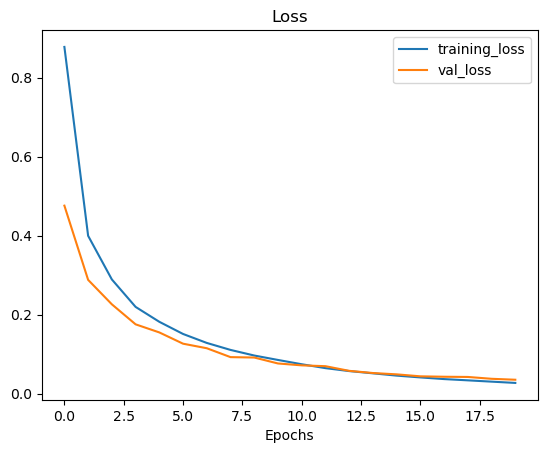

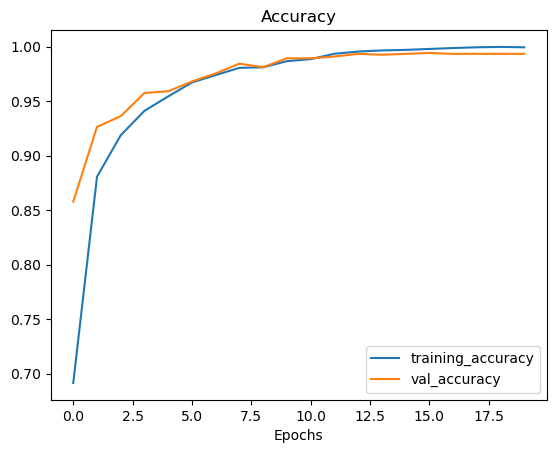

In [19]:
plot_loss_curves(resnet_history)

In [24]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("C:/Users/orange/Desktop/Graduation project/data/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)
     

['fifty jordanian dinar' 'five jordanian dinar' 'one jordanian dinar'
 'ten jordanian dinar' 'twenty jordanian dinar']


In [25]:
import matplotlib.pyplot as plt 

In [26]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [27]:
from gtts import gTTS
from playsound import playsound
import time



def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = tf.argmax(pred, axis=1).numpy()[0]
    label_name = class_names[pred_class]
    timestamp = int(time.time())
    filename = f"/Users/orange/banknotesound_{timestamp}.mp3"
    # Convert predicted class name to speech
    tts = gTTS(text=label_name, lang='en')
    tts.save(filename)

    # Play the sound if the predicted class is detected
    if pred_class != 0:
        playsound(filename)

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {label_name}")
    plt.axis(False)
    plt.show()

    return pred_class






In [36]:
class_names[0]


'fifty jordanian dinar'

In [37]:
# Test our model on a custom image

import tensorflow as tf 
import tensorflow_hub as hub
resnet_model = tf.keras.models.load_model(
       ('banknoteclassification_model'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)



1/1 [==============================] - 0s 468ms/step


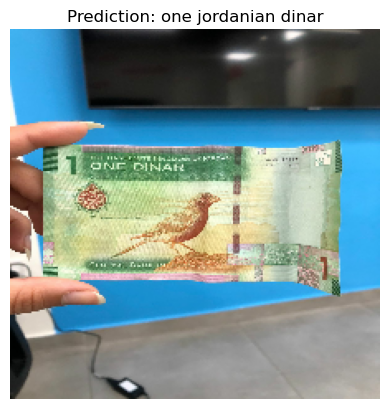

2

In [38]:
# image = r"C:\Users\orange\Desktop\Graduation project\dataset\one jordanian dinar\1jod.jpg"
# image = load_and_prep_image(image)
pred_and_plot(resnet_model,r"C:\Users\orange\Desktop\NewEdition\one jordanian dinar\0c527677-e8f7-4516-b170-d6093643db0e.jpg", class_names)


1/1 [==============================] - 0s 91ms/step


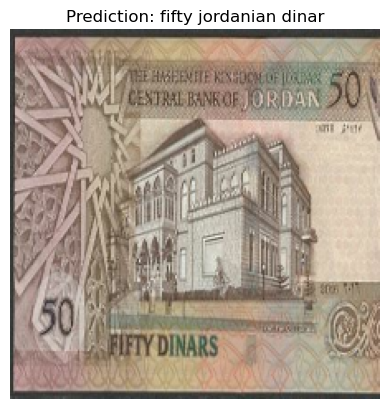

0

In [39]:
pred_and_plot(resnet_model, r"C:\Users\orange\Desktop\download.jfif", class_names)

In [40]:
resnet_model.evaluate(test_data)

39/39 [==============================] - 71s 2s/step - loss: 0.0353 - accuracy: 0.9935


[0.03534066677093506, 0.9934640526771545]

In [ ]:
resnet_model.summary()

In [ ]:
# import cv2
# import numpy as np
# from gtts import gTTS
# import os
# import tensorflow as tf
# import tensorflow_hub as hub

# # Define the label map
# # label_map = {0: "one jordanian dinar", 1: "five jordanian dinar", 2: "ten jordanian dinar", 3: "twenty jordanian dinar", 4: "fifty jordanian dinar"}

# # Load the trained model
# # model = tf.keras.models.load_model('banknoteclassification_model.h5')
# model = tf.keras.models.load_model(
#        ('banknoteclassification_model.h5'),
#        custom_objects={'KerasLayer':hub.KerasLayer}
# )


# # Initialize the video capture object
# cap = cv2.VideoCapture(0)

# # Initialize the predicted label
# prev_pred_class = " "

# while True:
#     # Capture a frame from the video stream
#     ret, frame = cap.read()

#     # Preprocess the frame
#     resized_frame = cv2.resize(frame, (224, 224))
#     normalized_frame = resized_frame / 255.0
#     input_frame = np.expand_dims(normalized_frame, axis=0)
    
#     # Make a prediction
#     reshaped_frame = np.reshape(input_frame, (224, 224, 3))
#     pred = model.predict(tf.expand_dims(reshaped_frame, axis=0))

#     # Get the predicted class
#     pred_class = tf.argmax(pred, axis=1).numpy()[0]
#     label_name = class_names[(pred_class)]

#     # Draw the predicted label on the frame
#     cv2.putText(frame, label_name, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#     # Convert the predicted label to voice output if the label has changed
#     if prev_pred_class != pred_class:
#         language = "en"
#         tts = gTTS(text=label_name, lang=language, slow=False)
#         tts.save("prediction.mp3")
#         os.system("mpg321 prediction.mp3")
#         prev_pred_class = pred_class
    
#     # Show the frame
#     cv2.imshow("Object Detection", frame)

#     # Break the loop if 'q' is pressed
#     if cv2.waitKey(1) == ord('q'):
#         break

# # Release the video capture object and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from gtts import gTTS
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
!pip install playsound==1.2.2
import playsound

# Define the label map
# label_map = {0: "one jordanian dinar", 1: "five jordanian dinar", 2: "ten jordanian dinar", 3: "twenty jordanian dinar", 4: "fifty jordanian dinar"}

# Load the trained model
# model = tf.keras.models.load_model('banknoteclassification_model.h5')
model = tf.keras.models.load_model(
       ('banknoteclassification_model'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

# Initialize the video capture object
cap = cv2.VideoCapture(0)

# Initialize the predicted label
prev_pred_class = -1
counter = 0

while True:
    # Capture a frame from the video stream
    ret, frame = cap.read()

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (224, 224))
    normalized_frame = resized_frame / 255.0
    input_frame = np.expand_dims(normalized_frame, axis=0)
    
    # Make a prediction
    reshaped_frame = np.reshape(input_frame, (224, 224, 3))
    pred = model.predict(tf.expand_dims(reshaped_frame, axis=0))

    # Get the predicted class
    pred_class = tf.argmax(pred, axis=1).numpy()[0]
    label_name = class_names[(pred_class)]

    # Draw the predicted label on the frame
    cv2.putText(frame, label_name, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Convert the predicted label to voice output if the label has changed
    if prev_pred_class != pred_class:
        language = "en"
        timestamp = int(time.time())
        filename = f"/Users/orange/banknotesound_{timestamp}.mp3"
        tts = gTTS(text=label_name, lang=language, slow=False)
        tts.save(filename)

        playsound.playsound(filename)
        prev_pred_class = pred_class
        counter += 1
    
    # Show the frame
    cv2.imshow("Object Detection", frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()






In [41]:
#plot and pred 5 images at once 
import playsound as ps
def multipred_and_plot(model, filenames, class_names):
    """
    Imports images located at filenames, makes predictions on them with
    a trained model and plots the images with the predicted classes as the title.
    Returns a list of predicted classes.
    """
    pred_classes = []
    for filename in filenames:
        # Import the target image and preprocess it
        img = load_and_prep_image(filename)

        # Make a prediction
        pred = model.predict(tf.expand_dims(img, axis=0))

        # Get the predicted class
        pred_class = tf.argmax(pred, axis=1).numpy()[0]
        label_name = class_names[pred_class]
        timestamp = int(time.time())
        filename = f"/Users/orange/banknotesound_{timestamp}.mp3"
        # Convert predicted class name to speech
        tts = gTTS(text=label_name, lang='en')
        tts.save(filename)

        # Play the sound if the predicted class is detected
        if pred_class >=0:
            ps.playsound(filename)

        # Plot the image and predicted class
        plt.imshow(img)
        plt.title(f"Prediction: {label_name}")
        plt.axis(False)
        plt.show()

        # Print the predicted class
        print(f"Prediction for {filename}: {label_name}")

        # Add the predicted class to the list
        pred_classes.append(pred_class)

    # Return the list of predicted classes
    return pred_classes


1/1 [==============================] - 0s 94ms/step


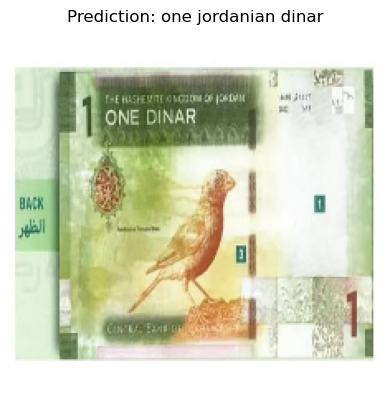

Prediction for /Users/orange/banknotesound_1685548081.mp3: one jordanian dinar
1/1 [==============================] - 0s 87ms/step


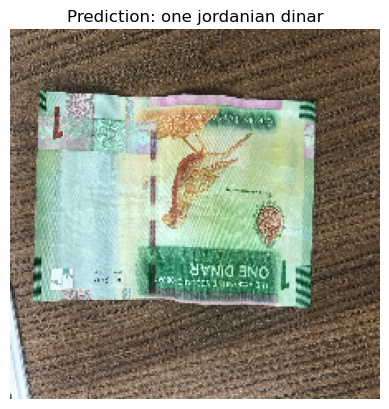

Prediction for /Users/orange/banknotesound_1685548084.mp3: one jordanian dinar
1/1 [==============================] - 0s 88ms/step


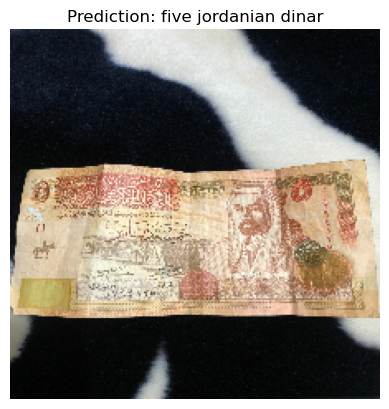

Prediction for /Users/orange/banknotesound_1685548087.mp3: five jordanian dinar
1/1 [==============================] - 0s 88ms/step


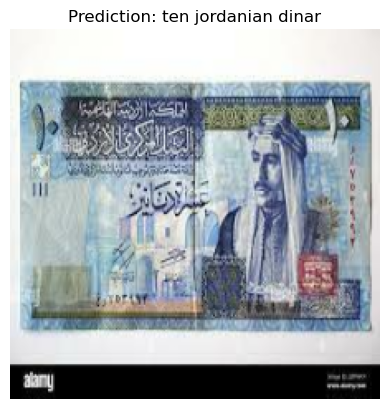

Prediction for /Users/orange/banknotesound_1685548090.mp3: ten jordanian dinar


[2, 2, 1, 3]

In [43]:
filenames = [r"C:\Users\orange\Desktop\Jordans-new-currency21.jpg", 
             r"C:\Users\orange\Desktop\Banknotes sample\onejordaniandinarnew.jfif",
             r"C:\Users\orange\Desktop\Banknotes sample\fivvv.jfif",r"C:\Users\orange\Desktop\Banknotes sample\100.jfif"]
multipred_and_plot(resnet_model, filenames, class_names)



In [ ]:
# from flask import Flask, request, jsonify
# from gtts import gTTS
# from playsound import playsound
# import time
# import tensorflow as tf

# app = Flask(__name__)

# # Load the model
# model = tf.keras.models.load_model('model.h5')

# # Define the class names
# class_names = ['10 Euro', '20 Euro', '50 Euro', '100 Euro', '200 Euro', '500 Euro']

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the image file from the request
#     file = request.files['image']

#     # Read and preprocess the image
#     img = load_and_prep_image(file)

#     # Make a prediction
#     pred = model.predict(tf.expand_dims(img, axis=0))

#     # Get the predicted class
#     pred_class = tf.argmax(pred, axis=1).numpy()[0]
#     label_name = class_names[pred_class]

#     # Convert predicted class name to speech
#     timestamp = int(time.time())
#     filename = f"/Users/orange/banknotesound_{timestamp}.mp3"
#     tts = gTTS(text=label_name, lang='en')
#     tts.save(filename)

#     # Wait for the audio file to be fully generated
#     time.sleep(1)

#     # Play the sound if the predicted class is detected
#     if pred_class != 0:
#         playsound(filename)

#     # Return the predicted class as a JSON response
#     return jsonify({'class': label_name})

# if __name__ == '__main__':
#     app.run()


In [ ]:
# #************************************************#YOLOv3********************************************************
# import cv2
# import numpy as np
# import tensorflow as tf
# import tensorflow_hub as hub

# def create_model(model_url, num_classes=5):
#   """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
#   Args:
#     model_url (str): A TensorFlow Hub feature extraction URL.
#     num_classes (int): Number of output neurons in output layer,
#       should be equal to number of target classes, default 5.

#   Returns:
#     An uncompiled Keras Sequential model with model_url as feature
#     extractor layer and Dense output layer with num_classes outputs.
#   """
#   # Download the pretrained model and save it as a Keras layer
#   feature_extractor_layer = hub.KerasLayer(model_url,
#                                            trainable=False, # freeze the underlying patterns
#                                            name='feature_extraction_layer',
#                                            input_shape=(416, 416, 3)) # define the input image shape
  
#   # Create our own model
#   model = tf.keras.Sequential([
#     feature_extractor_layer, # use the feature extraction layer as the base
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
#   ])

#   return model

# # Define the YOLOv3 model URL from TensorFlow Hub
# model_url = 'https://tfhub.dev/tensorflow/yolov3/1'

# # Create the TensorFlow model with YOLOv3 as the feature extractor
# model = create_model(model_url, num_classes=5)

# # Load the trained weights for the feature extractor
# model.load_weights('yolov3_weights.h5')

# # Define the classes to be detected
# classes = ["class1", "class2", "class3", "class4", "class5"]

# # Load the image to be classified
# image = cv2.imread('test_image.jpg')

# # Preprocess the image and convert it to a format that can be used with YOLO
# image = cv2.resize(image, (416, 416))
# image = image / 255.0
# image = np.expand_dims(image, axis=0)

# # Perform object detection and classification using the YOLO model
# boxes, scores, classes, nums = model.predict(image)

# # Display the results
# for i in range(nums[0]):
#     box = boxes[0][i]
#     score = scores[0][i]
#     label = np.argmax(classes[0][i])
#     if score > 0.5:
#         x1 = int(box[0] * image.shape[1])
#         y1 = int(box[1] * image.shape[0])
#         x2 = int(box[2] * image.shape[1])
#         y2 = int(box[3] * image.shape[0])
#         cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         cv2.putText(image, classes[label] + ' ' + str(round(score * 100, 2)) + '%', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# cv2.imshow("Image", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
